# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

*FILL IN:*

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from folium import plugins
from folium.plugins import HeatMap
#chose style for the code 
plt.style.use('fivethirtyeight')
#to disply all columns in the table 
pd.set_option('display.max_rows', 500)

#### **Dataset 1**

Type: accessing APIs 

Method: Gather data by accessing APIs from source data.lacity.org (e.g., The data was gathered using the "API Access" method from https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/data_preview source.)

Dataset variables:

*   *Variable 1 FILL IN* (e.g., H_MEAN: Mean hourly wage)
*   *Variable 2 FILL IN*

In [2]:
#FILL IN 1st data gathering and loading method
#crime data website : https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/data_preview

data=requests.get('https://data.lacity.org/resource/2nrs-mtv8.json').json()

data_crime_2020_2024 = pd.DataFrame.from_dict(data)


#### Dataset 2

Type: CSV File

Method:  The data was gathered using the Download data manually method from https://data.lacity.org/ source.)

Dataset variables:

*   *Variable 1 FILL IN* (e.g., H_MEAN: Mean hourly wage)
*   *Variable 2 FILL IN*

In [3]:
#FILL IN 2nd data gathering and loading method
data_crime_2019=pd.read_csv('Crime_Data_from_2010_to_2019_20240118.csv')

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [4]:
#Optional: store the raw data in your local data store
data_crime_2020_2024.to_csv('data_crime_2024',index=False)

In [5]:
data_crime_2024=pd.read_csv('data_crime_2024')

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1: completeness => Missing data

#### Inspecting the dataframe visually

In [6]:
# Inspecting the dataframe visually
data_crime_2019.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


<Axes: >

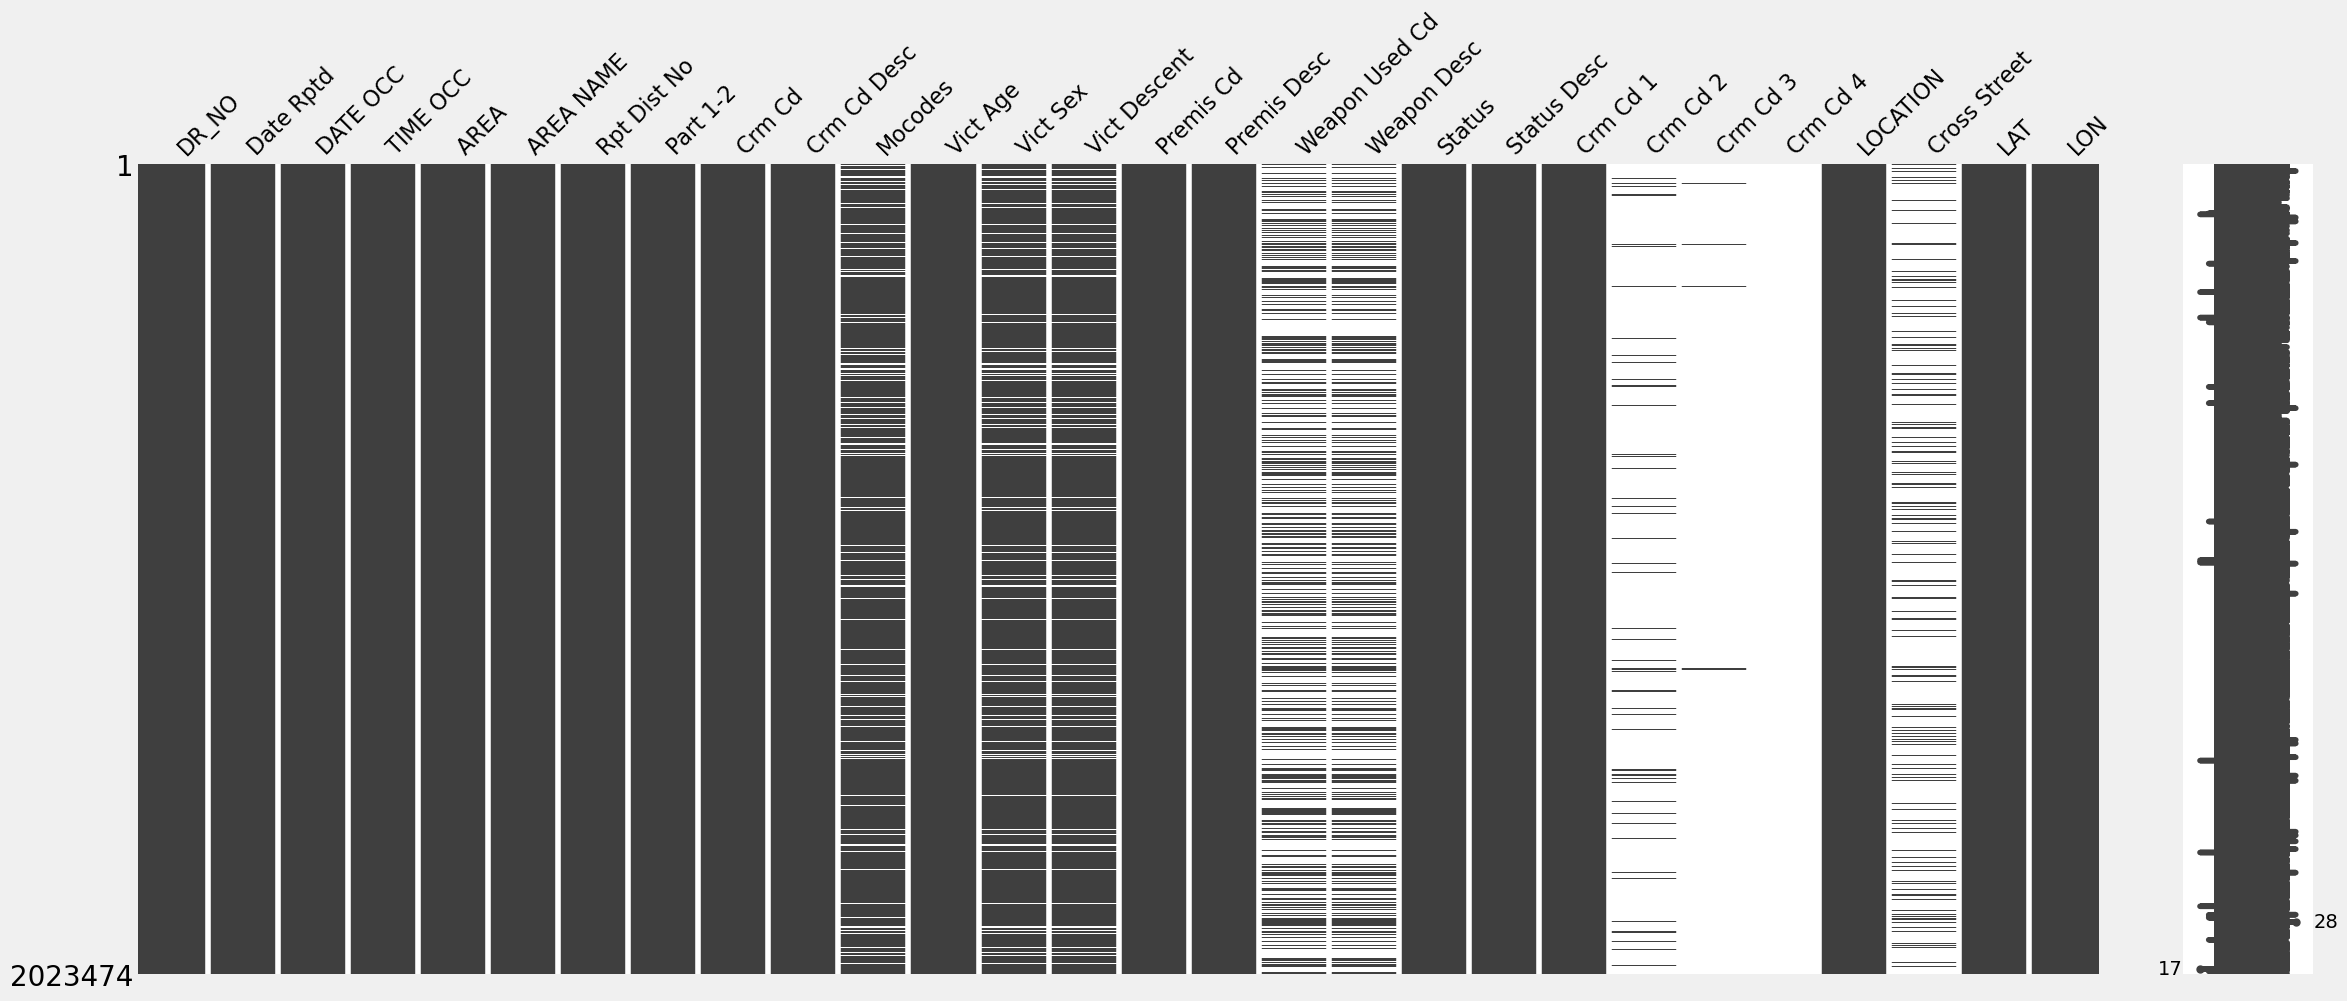

In [7]:
#visualize missing data on the dataframe 
msno.matrix(data_crime_2019)

In [8]:
#Inspecting the dataframe visually
data_crime_2024.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street
0,10304468,2020-01-08T00:00:00.000,2020-01-08T00:00:00.000,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624,1100 W 39TH PL,34.0141,-118.2978,NaN,NaN
1,190101086,2020-01-02T00:00:00.000,2020-01-01T00:00:00.000,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,624,700 S HILL ST,34.0459,-118.2545,NaN,NaN
2,200110444,2020-04-14T00:00:00.000,2020-02-13T00:00:00.000,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,NaN,NaN,AA,Adult Arrest,845,200 E 6TH ST,34.0448,-118.2474,NaN,NaN
3,191501505,2020-01-01T00:00:00.000,2020-01-01T00:00:00.000,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,NaN,NaN,IC,Invest Cont,745,5400 CORTEEN PL,34.1685,-118.4019,998.0,NaN
4,191921269,2020-01-01T00:00:00.000,2020-01-01T00:00:00.000,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,NaN,NaN,IC,Invest Cont,740,14400 TITUS ST,34.2198,-118.4468,NaN,NaN


<Axes: >

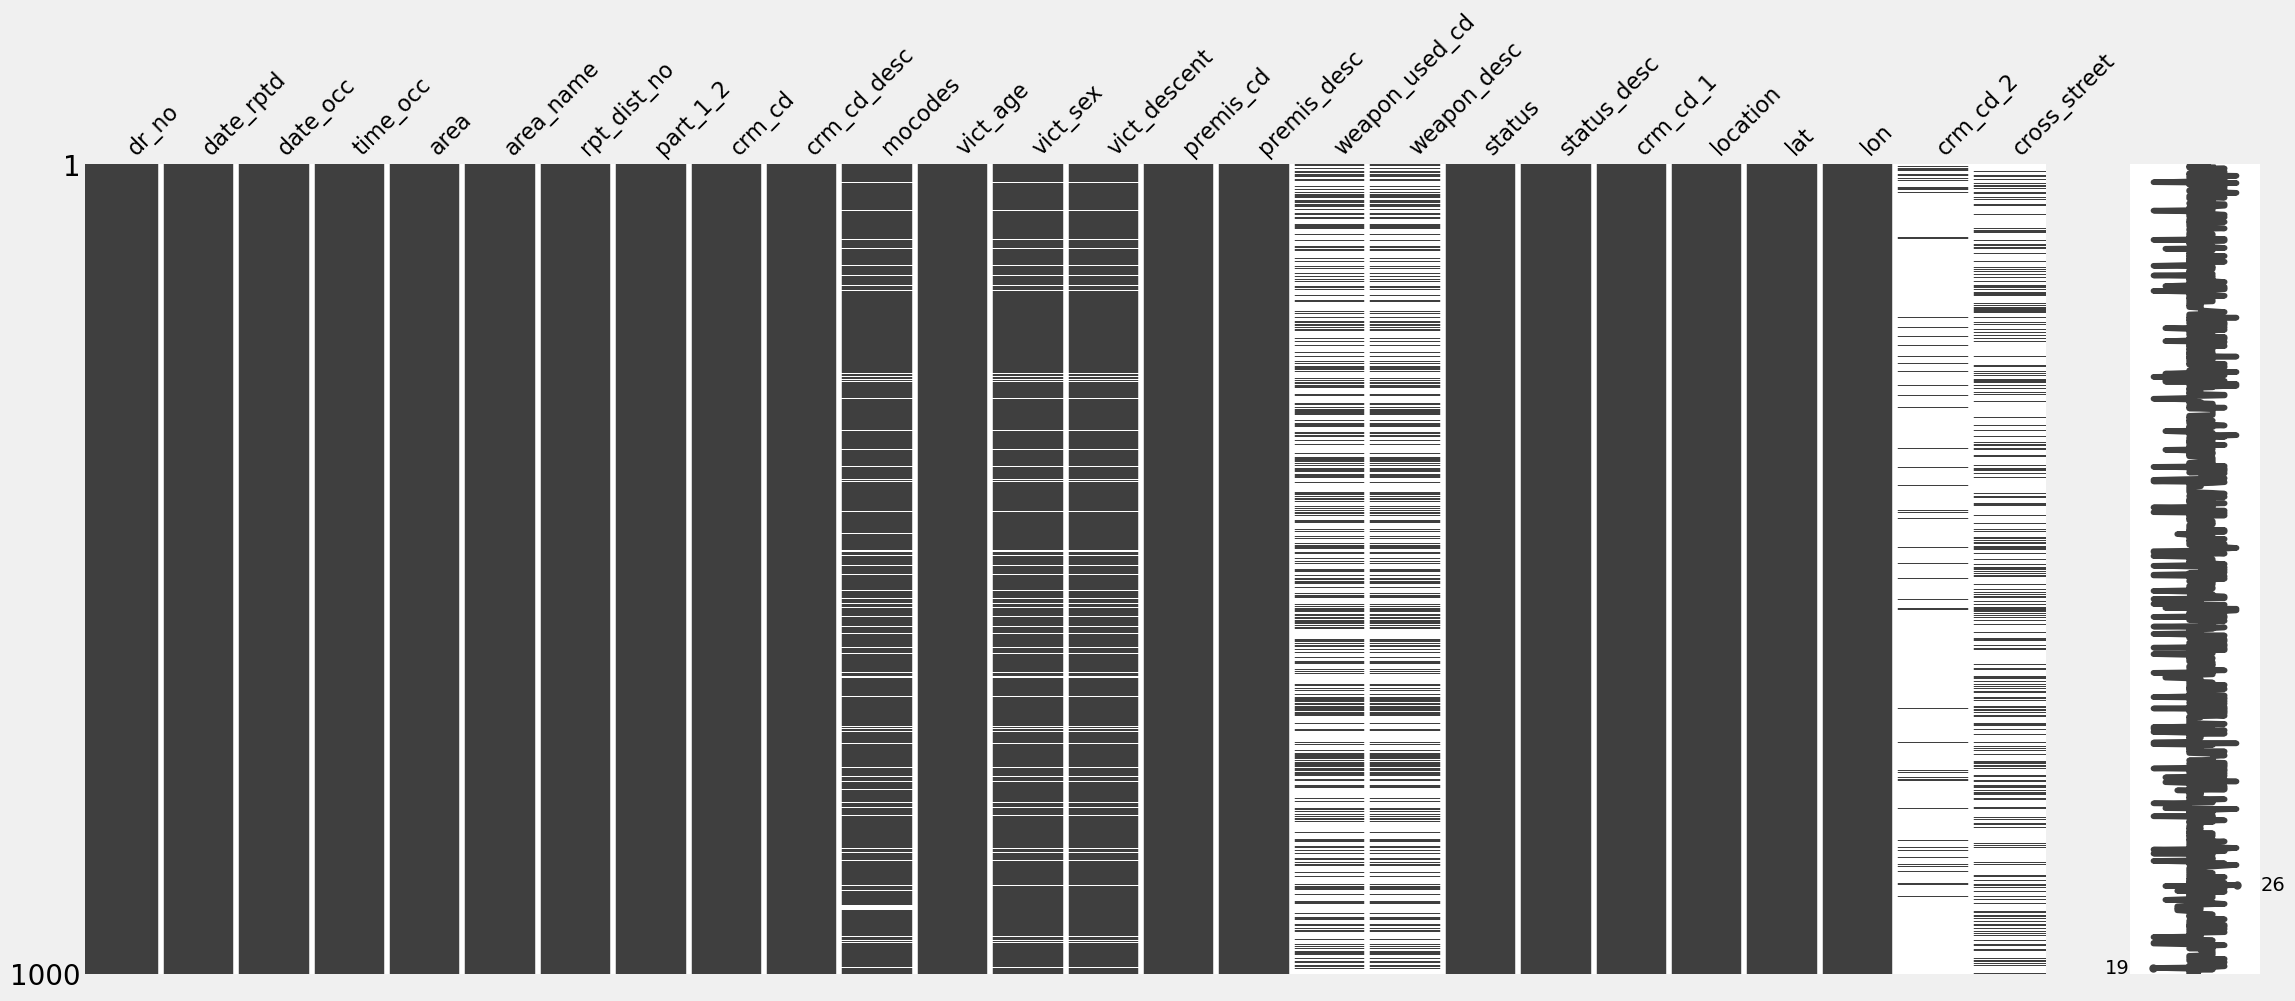

In [9]:
##visualize missing data on the dataframe
msno.matrix(data_crime_2024)

#### Inspecting the dataframe programmatically

In [10]:
#FILL IN - Inspecting the dataframe programmatically
print(data_crime_2019.shape)
data_crime_2019.isnull().sum()

(2023474, 28)


DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            219375
Vict Age                0
Vict Sex           191568
Vict Descent       191612
Premis Cd              44
Premis Desc           283
Weapon Used Cd    1336951
Weapon Desc       1336951
Status                  3
Status Desc             0
Crm Cd 1               13
Crm Cd 2          1884591
Crm Cd 3          2019703
Crm Cd 4          2023376
LOCATION                0
Cross Street      1682736
LAT                     0
LON                     0
dtype: int64

In [11]:
print(data_crime_2024.shape)
data_crime_2024.isnull().sum()

(1000, 26)


dr_no               0
date_rptd           0
date_occ            0
time_occ            0
area                0
area_name           0
rpt_dist_no         0
part_1_2            0
crm_cd              0
crm_cd_desc         0
mocodes            73
vict_age            0
vict_sex           63
vict_descent       63
premis_cd           0
premis_desc         0
weapon_used_cd    615
weapon_desc       615
status              0
status_desc         0
crm_cd_1            0
location            0
lat                 0
lon                 0
crm_cd_2          934
cross_street      709
dtype: int64

Issue and justification: 
#### its completeness issue Quality issue there is a lot missing values in both datasets :
> #### data_crime_2019 dataset : there is missing values in Crm Cd 2 ,Crm Cd 3 ,Crm Cd 4 most of the columns are missing values and vict_sex,vict_descent, weapon_used_cd ,weapon_desc more than 100 K missing values 
> #### data_crime_2024 dataset : there is missing values incrm_cd_2 ,cross_street most of the columns are minssing values and weapon_used_cd , weapon_desc half of the columns are missing values

### Quality Issue 2:

In [12]:
# Inspecting  duplictes values in the dataframe visually for data_crimes_2019
duplictated_values_2019=data_crime_2019[data_crime_2019['DR_NO'].isin(data_crime_2019['DR_NO'].value_counts().index[data_crime_2019['DR_NO'].value_counts() == 2])].sort_values(by='DR_NO')
duplictated_values_2019

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
88471,111516503,08/24/2011 12:00:00 AM,08/01/2011 12:00:00 AM,2048,15,N Hollywood,1581,2,661,UNAUTHORIZED COMPUTER ACCESS,...,AO,Adult Other,661.0,NaN,NaN,NaN,4300 LAURELGROVE AV,NaN,34.1486,-118.4008
400429,111516503,08/24/2011 12:00:00 AM,08/01/2011 12:00:00 AM,2048,15,N Hollywood,1581,2,661,UNAUTHORIZED COMPUTER ACCESS,...,AO,Adult Other,661.0,NaN,NaN,NaN,4300 LAURELGROVE AV,NaN,34.1486,-118.4008
88287,111516504,08/24/2011 12:00:00 AM,08/24/2011 12:00:00 AM,930,15,N Hollywood,1515,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626.0,NaN,NaN,NaN,11700 HART ST,NaN,34.1976,-118.3878
398846,111516504,08/24/2011 12:00:00 AM,08/24/2011 12:00:00 AM,930,15,N Hollywood,1515,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626.0,NaN,NaN,NaN,11700 HART ST,NaN,34.1976,-118.3878
288745,111516506,08/24/2011 12:00:00 AM,08/23/2011 12:00:00 AM,1600,15,N Hollywood,1513,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,6600 WILKINSON AV,NaN,34.1913,-118.4041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549355,241504716,01/15/2024 12:00:00 AM,10/14/2018 12:00:00 AM,1830,15,N Hollywood,1522,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,13000 VICTORY BL,NaN,34.1936,-118.4166
1709970,241604204,01/05/2024 12:00:00 AM,01/01/2018 12:00:00 AM,1,16,Foothill,1653,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,12700 OSBORNE ST,NaN,34.2542,-118.4095
1480569,241604204,01/05/2024 12:00:00 AM,01/01/2018 12:00:00 AM,1,16,Foothill,1653,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,12700 OSBORNE ST,NaN,34.2542,-118.4095
1370012,242104427,01/10/2024 12:00:00 AM,01/10/2018 12:00:00 AM,1220,21,Topanga,2172,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,23300 MARIANO ST,NaN,34.1685,-118.6393


In [13]:
# Inspecting the dataframe programmatically for data_crimes_2019
data_crime_2019.duplicated('DR_NO').value_counts()

False    1793453
True      230021
Name: count, dtype: int64

In [14]:
# Inspecting  duplictes values in the dataframe visually for data_crimes_2024
duplictated_values_2024=data_crime_2024[data_crime_2024['dr_no'].isin(data_crime_2024['dr_no'].value_counts().index[data_crime_2024['dr_no'].value_counts() == 2])].sort_values(by='dr_no')
duplictated_values_2024

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street


In [15]:
# Inspecting the dataframe programmatically for data_crimes_2019
data_crime_2024.duplicated('dr_no').value_counts()

False    1000
Name: count, dtype: int64

#### Issue and justification: 
> #### its Uniqueness issue in data Quality issues there is 230021 rows duplicte depand in dr_no column

### Tidiness Issue 1:

In [16]:
# Inspecting the dataframe visually
data_crime_2019.head(0)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON


In [17]:
#Inspecting the dataframe visually
data_crime_2024.head(0)

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,weapon_used_cd,weapon_desc,status,status_desc,crm_cd_1,location,lat,lon,crm_cd_2,cross_street


In [18]:
#FILL IN - Inspecting the dataframe programmatically
data_crime_2019.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA ', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [19]:
data_crime_2024.columns

Index(['dr_no', 'date_rptd', 'date_occ', 'time_occ', 'area', 'area_name',
       'rpt_dist_no', 'part_1_2', 'crm_cd', 'crm_cd_desc', 'mocodes',
       'vict_age', 'vict_sex', 'vict_descent', 'premis_cd', 'premis_desc',
       'weapon_used_cd', 'weapon_desc', 'status', 'status_desc', 'crm_cd_1',
       'location', 'lat', 'lon', 'crm_cd_2', 'cross_street'],
      dtype='object')

#### Issue and justification: 
> #### uppercase letters are used for column names in data_crime_2019 and lowercase letters are used for column names in data_crime_2024
we have to change data_crime_2019 columns name to lower case letters and change columns to snake_case so we can index it easliy 

### Tidiness Issue 2: 

In [20]:
#Inspecting the dataframe visually for data_crime_2019
data_crime_2019['Crm Cd Desc']

0                                   VIOLATION OF COURT ORDER
1          VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
2                                  OTHER MISCELLANEOUS CRIME
3                                   VIOLATION OF COURT ORDER
4                                            RAPE, ATTEMPTED
                                 ...                        
2023469              CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT
2023470                                                ARSON
2023471               CRIMINAL THREATS - NO WEAPON DISPLAYED
2023472      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
2023473                                BURGLARY FROM VEHICLE
Name: Crm Cd Desc, Length: 2023474, dtype: object

In [21]:
#Inspecting the dataframe programmatically for data_crime_2019
data_crime_2019['Crm Cd Desc'].unique()

array(['VIOLATION OF COURT ORDER',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'OTHER MISCELLANEOUS CRIME', 'RAPE, ATTEMPTED',
       'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'BURGLARY FROM VEHICLE',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BATTERY - SIMPLE ASSAULT', 'ROBBERY', 'BOMB SCARE',
       'CHILD NEGLECT (SEE 300 W.I.C.)',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED', 'ATTEMPTED ROBBERY',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'BURGLARY', 'ARSON',
       'RAPE, FORCIBLE', 'BRANDISH WEAPON',
       'THROWING OBJECT AT MOVING VEHICLE',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
       'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
       'SHOTS FIRED AT INHABITED DWELLING', 'VEHICLE - STOLEN',
    

In [22]:
#Inspecting the dataframe visually for data_crime_2024
data_crime_2024.crm_cd_desc.head()

0                             BATTERY - SIMPLE ASSAULT
1                             BATTERY - SIMPLE ASSAULT
2            SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
3             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
4    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
Name: crm_cd_desc, dtype: object

In [23]:
#Inspecting the dataframe programmatically for data_crime_2019
data_crime_2024.crm_cd_desc.unique()

array(['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'THEFT PLAIN - PETTY ($950 & UNDER)', 'ROBBERY',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'BURGLARY',
       'VEHICLE - STOLEN', 'BRANDISH WEAPON',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'BATTERY POLICE (SIMPLE)',
       'TRESPASSING', 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'THEFT FROM MOTOR VEHICLE - ATTEMPT',
       'THROWING OBJECT AT MOVING VEHICLE', 'THEFT OF IDENTIT

Issue and justification:
> #### its  Multiple variables are stored in one column 
> #### there is muliple variables in the same cell in one columns crm cd desc the crime description and grand and many crimes 
> we have to separate each crime in one row and grands in another column 

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [24]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
data_crime_2019_copy=data_crime_2019.copy()
data_crime_2024_copy=data_crime_2024.copy()

### **Quality Issue 1: FILL IN**

In [ ]:
#Apply the cleaning strategy


In [ ]:
#Validate the cleaning was successful

Justification: *FILL IN*

### **Quality Issue 2: FILL IN**

In [ ]:
#Apply the cleaning strategy

In [ ]:
#Validate the cleaning was successful

Justification: *FILL IN*

### **Tidiness Issue 1: FILL IN**

In [ ]:
#Apply the cleaning strategy

In [ ]:
#Validate the cleaning was successful

Justification: *FILL IN*

### **Tidiness Issue 2: FILL IN**

In [ ]:
#FILL IN - Apply the cleaning strategy

In [ ]:
#FILL IN - Validate the cleaning was successful

Justification: *FILL IN*

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [ ]:
#Remove unnecessary variables and combine datasets

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [ ]:
#saving data

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* FILL IN from answer to Step 1

In [ ]:
#Visual 1 - FILL IN

*Answer to research question:* FILL IN

In [ ]:
#Visual 2 - FILL IN

*Answer to research question:* FILL IN

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN